# Player Market Value Prediction

A player's market value is an estimated figure that buying teams should pay to acquire services of the player. This figure is dynamic and changes based on the age of the player, years left on the player's contract and how well they do footballing wise in a particular season between transfer windows.

In our model, we use stats from the FIFA video game to predict this figure

In [ ]:
#importing all the various modules
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#loading dataset onto pandas dataframe 
predata=pd.read_csv("players_22.csv")
predata

,short_name,player_positions,overall,potential,wage_eur,age,club_contract_valid_until,nationality_name,preferred_foot,weak_foot,skill_moves,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,value_eur
0,L. Messi,"RW, ST, CF",93,93,320000,34,2023,Argentina,Left,4,4,144300000,85,92,91,95,34,65,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,0,78000000
1,R. Lewandowski,ST,92,92,270000,32,2023,Poland,Right,4,4,197200000,78,92,79,86,44,82,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0,119500000
2,Cristiano Ronaldo,"ST, LW",91,91,270000,36,2023,Portugal,Right,4,5,83300000,87,94,80,88,34,75,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0,45000000
3,Neymar Jr,"LW, CAM",91,91,270000,29,2025,Brazil,Right,5,5,238700000,91,83,86,94,37,63,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0,129000000
4,K. De Bruyne,"CM, CAM",91,91,350000,30,2025,Belgium,Right,5,4,232200000,76,86,93,88,64,78,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,0,125500000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,Song Defu,CDM,47,52,1000,22,2021,China PR,Right,3,2,114000,58,35,46,48,42,49,46,32,48,50,30,45,33,38,48,49,56,60,55,53,70,46,62,51,46,30,52,42,38,43,42,37,38,43,48,6,10,5,15,13,0,70000
19235,C. Porter,CM,47,59,500,19,2021,Republic of Ireland,Right,3,2,193000,59,39,50,46,41,51,54,33,46,51,32,41,53,31,50,42,60,58,64,49,69,49,47,63,47,38,49,39,51,49,44,47,37,44,47,11,12,6,8,10,0,110000
19236,N. Logue,CM,47,55,500,21,2021,Republic of Ireland,Right,3,2,175000,60,37,45,49,41,52,39,32,43,49,37,47,37,37,49,49,60,60,58,46,59,50,57,56,50,34,51,38,45,46,39,36,38,44,48,8,6,7,10,6,0,100000
19237,L. Rudden,ST,47,60,500,19,2021,Republic of Ireland,Right,3,2,239000,68,46,36,48,15,42,29,49,40,38,34,42,36,34,33,45,69,67,72,48,73,48,50,50,40,41,34,14,47,40,49,47,10,14,11,7,10,7,14,15,0,110000


In [ ]:
#Removing name, nationality name and player position i.e. all the string variables
x=predata.iloc[:,1:-1]
x.drop(['nationality_name','player_positions'],axis=1, inplace=True)
y=predata.iloc[:,-1]
#Storing short name for reference
z=predata['short_name']

#One hot encoding preferred foot column
x= pd.get_dummies(x, columns = ['preferred_foot'])
x


,overall,potential,wage_eur,age,club_contract_valid_until,weak_foot,skill_moves,release_clause_eur,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,preferred_foot_Left,preferred_foot_Right
0,93,93,320000,34,2023,4,4,144300000,85,92,91,95,34,65,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,0,1,0
1,92,92,270000,32,2023,4,4,197200000,78,92,79,86,44,82,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0,0,1
2,91,91,270000,36,2023,4,5,83300000,87,94,80,88,34,75,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0,0,1
3,91,91,270000,29,2025,5,5,238700000,91,83,86,94,37,63,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0,0,1
4,91,91,350000,30,2025,5,4,232200000,76,86,93,88,64,78,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,47,52,1000,22,2021,3,2,114000,58,35,46,48,42,49,46,32,48,50,30,45,33,38,48,49,56,60,55,53,70,46,62,51,46,30,52,42,38,43,42,37,38,43,48,6,10,5,15,13,0,0,1
19235,47,59,500,19,2021,3,2,193000,59,39,50,46,41,51,54,33,46,51,32,41,53,31,50,42,60,58,64,49,69,49,47,63,47,38,49,39,51,49,44,47,37,44,47,11,12,6,8,10,0,0,1
19236,47,55,500,21,2021,3,2,175000,60,37,45,49,41,52,39,32,43,49,37,47,37,37,49,49,60,60,58,46,59,50,57,56,50,34,51,38,45,46,39,36,38,44,48,8,6,7,10,6,0,0,1
19237,47,60,500,19,2021,3,2,239000,68,46,36,48,15,42,29,49,40,38,34,42,36,34,33,45,69,67,72,48,73,48,50,50,40,41,34,14,47,40,49,47,10,14,11,7,10,7,14,15,0,0,1


In [ ]:
#Dropping further columns not important for the prediction
x_trim=x.drop(["wage_eur", "club_contract_valid_until", "weak_foot", "skill_moves", "release_clause_eur", "preferred_foot_Left", "preferred_foot_Right"], axis = 1)
x_trim

,overall,potential,age,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
0,93,93,34,85,92,91,95,34,65,85,95,70,91,88,96,93,94,91,96,91,80,91,94,95,86,68,72,69,94,44,40,93,95,75,96,20,35,24,6,11,15,14,8,0
1,92,92,32,78,92,79,86,44,82,71,95,90,85,89,85,79,85,70,88,77,79,77,93,82,90,85,76,86,87,81,49,95,81,90,88,35,42,19,15,6,12,8,10,0
2,91,91,36,87,94,80,88,34,75,87,95,90,80,86,88,81,84,77,88,85,88,86,94,74,94,95,77,77,93,63,29,95,76,88,95,24,32,24,7,11,15,14,11,0
3,91,91,29,91,83,86,94,37,63,85,83,63,86,86,95,88,87,81,95,93,89,96,89,84,80,64,81,53,81,63,37,86,90,93,93,35,32,29,9,9,15,15,11,0
4,91,91,30,76,86,93,88,64,78,94,82,55,94,82,88,85,83,93,91,76,76,79,91,78,91,63,89,74,91,76,66,88,94,83,89,68,65,53,15,13,5,10,13,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19234,47,52,22,58,35,46,48,42,49,46,32,48,50,30,45,33,38,48,49,56,60,55,53,70,46,62,51,46,30,52,42,38,43,42,37,38,43,48,6,10,5,15,13,0
19235,47,59,19,59,39,50,46,41,51,54,33,46,51,32,41,53,31,50,42,60,58,64,49,69,49,47,63,47,38,49,39,51,49,44,47,37,44,47,11,12,6,8,10,0
19236,47,55,21,60,37,45,49,41,52,39,32,43,49,37,47,37,37,49,49,60,60,58,46,59,50,57,56,50,34,51,38,45,46,39,36,38,44,48,8,6,7,10,6,0
19237,47,60,19,68,46,36,48,15,42,29,49,40,38,34,42,36,34,33,45,69,67,72,48,73,48,50,50,40,41,34,14,47,40,49,47,10,14,11,7,10,7,14,15,0


In [ ]:
#Importing all the machine learning modules
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

#Splitting data - 25% for testing
X_train, X_test, y_train, y_test = train_test_split(x_trim, y, test_size=0.25, random_state=1)
X_train


,overall,potential,age,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
2645,73,73,32,47,28,49,56,76,72,32,23,76,61,25,57,26,19,65,58,43,50,42,64,37,34,32,50,85,27,75,75,28,44,62,70,78,75,74,15,16,12,9,15,0
1830,75,75,25,50,50,50,50,50,50,9,8,10,20,9,9,8,7,16,21,34,38,31,72,41,46,67,41,81,7,36,22,11,51,19,67,23,10,10,77,76,61,72,73,36
3589,72,72,21,69,64,73,73,43,54,71,67,51,73,62,73,72,67,69,76,68,70,73,65,70,55,67,66,54,66,37,46,74,78,64,66,26,54,42,11,15,12,9,7,0
10874,65,68,26,58,23,49,49,65,68,25,18,65,60,29,46,28,20,62,53,56,59,41,63,49,34,73,64,74,16,59,67,28,56,40,53,65,65,64,5,6,12,13,11,0
18423,54,71,17,60,26,39,40,54,58,29,20,52,50,34,37,34,27,39,35,53,66,47,51,63,41,69,54,63,21,47,57,25,35,35,40,50,57,49,9,8,8,8,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10955,65,79,19,73,58,60,66,41,51,59,67,37,66,34,65,55,48,62,68,76,70,68,59,61,58,61,60,53,44,31,31,58,55,47,62,28,58,54,5,8,6,15,13,0
17289,57,73,17,77,49,52,63,35,51,45,52,34,56,41,63,48,41,52,59,80,75,80,43,82,52,47,52,49,42,57,30,49,55,45,48,39,34,33,14,12,7,10,12,0
5192,70,79,22,77,40,61,71,67,66,66,36,58,64,31,73,56,31,61,67,76,78,73,68,82,56,83,69,60,32,72,66,63,59,39,67,64,71,70,11,10,12,15,15,0
12172,64,70,23,58,25,41,39,64,72,33,21,65,53,25,27,24,27,48,47,58,58,49,56,48,33,64,61,79,23,70,63,26,31,32,45,62,66,62,12,9,10,12,14,0


In [ ]:
y_train

2645      2000000
1830      4600000
3589      2800000
10874      825000
18423      250000
           ...   
10955     1700000
17289      400000
5192      3400000
12172      850000
235      35000000
Name: value_eur, Length: 14429, dtype: int64

In [ ]:
X_test

,overall,potential,age,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed
3339,72,74,28,52,57,63,60,70,77,62,52,72,67,38,57,67,60,63,63,49,55,64,67,55,70,80,62,83,64,79,68,49,55,58,66,69,73,70,9,12,12,11,11,0
11183,64,64,29,68,60,62,65,63,74,62,59,54,65,43,61,54,58,63,65,65,71,75,61,81,59,71,83,68,67,77,61,54,59,63,65,65,65,64,10,10,7,12,7,0
3645,72,72,28,76,71,67,76,27,64,65,75,58,73,73,76,71,66,52,75,77,75,81,72,77,69,66,77,67,68,38,20,74,69,55,72,26,21,27,13,10,11,11,13,0
8063,67,73,23,74,59,65,68,57,62,63,60,50,68,47,66,59,59,64,68,75,73,78,61,77,61,60,64,63,57,58,54,64,66,58,61,51,64,62,6,11,5,9,9,0
12536,63,68,24,77,45,57,63,59,70,52,42,53,62,42,63,42,44,60,61,76,78,68,59,71,49,73,78,63,46,75,58,57,59,48,58,59,61,59,10,7,11,9,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17246,57,71,19,72,58,55,66,18,46,54,59,51,58,57,65,62,60,49,63,75,69,80,42,85,56,67,52,47,61,32,13,49,51,59,62,12,16,17,12,11,7,7,11,0
5126,70,75,25,58,58,63,66,67,71,58,55,56,71,39,64,46,35,65,70,63,53,67,65,55,70,54,73,75,59,65,69,56,65,57,66,68,69,66,12,5,13,11,9,0
581,79,79,28,75,72,80,79,57,66,80,75,40,81,64,78,77,71,81,79,75,75,77,83,77,68,61,86,64,69,47,74,82,81,71,81,62,49,52,6,6,10,10,10,0
9489,66,66,30,55,25,47,37,68,64,48,21,68,65,22,22,20,25,42,48,54,55,41,60,56,35,66,55,73,20,54,70,26,31,36,49,67,69,65,9,9,9,10,14,0


In [ ]:
y_test

3339      2400000
11183      575000
3645      2400000
8063      1600000
12536      675000
           ...   
17246      400000
5126      2100000
581      17500000
9489       700000
14904      925000
Name: value_eur, Length: 4810, dtype: int64

In [ ]:
#kf = KFold(n_splits=5, shuffle=True, random_state = 23)

#print(np.mean(cross_val_score(lm, X, y, cv=kf, scoring='r2')))
#print(np.mean(cross_val_score(lm_reg, X, y, cv=kf, scoring='r2')))
#print(np.mean(cross_val_score(lm_poly, X, y, cv=kf, scoring='r2')))


In [ ]:
from sklearn.linear_model import LinearRegression
# creating an object of LinearRegression class
LR = LinearRegression()
# fitting the training data
LR.fit(X_train,y_train)


LinearRegression()

In [ ]:
#Prediction check
y_prediction =  LR.predict(X_test)
y_prediction


array([ 5252087.40878396, -1124974.74088518,  6952276.01458383, ...,
       14187539.1723448 ,  1074011.93800557,  1865235.60612557])

In [ ]:
linear_r2 = r2_score(y_test, y_prediction)
linear_r2

0.3692547150934551

In [ ]:
# Lasso Regression
lasso = linear_model.Lasso(alpha = 0.1)
lasso.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.552e+17, tolerance: 8.322e+13
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=0.1)

In [ ]:
lasso_pred = lasso.predict(X_test)
lasso_pred

array([ 5248210.0869723 , -1127647.45578017,  6951952.82363947, ...,
       14186154.07472228,  1068016.40277763,  1854016.52179635])

In [ ]:
lasso_r2 = r2_score(y_test, lasso_pred)
lasso_r2

0.3691692355395326

In [ ]:
# Elastic Net and checking scores
from sklearn.linear_model import ElasticNet
elnet = ElasticNet(random_state = 0)
elnet.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.563e+17, tolerance: 8.322e+13
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


ElasticNet(random_state=0)

In [ ]:
elnet.coef_

array([ 564842.81521039,  170998.0097494 , -272118.18144157,
         88503.23263797,   82464.20130041,  -60655.97075346,
        -37104.64726952,   86603.36830757,    1341.25439613,
          2071.75866989,  -13810.56028138,  -14890.12219422,
          2478.00798229,   31332.44111449,   -5124.31539425,
         14020.57567203,   10263.91135232,   25803.39457651,
        -58562.25400784,  -43988.52253111,  -21897.70993489,
        -28950.50069106,  101560.35725194,   35839.01574649,
        -42554.02718242,   -1083.52733498,  -16437.43570421,
         11202.24749252,  -47243.22569252,   -8874.76215771,
        -24041.45530639,   16495.54964344,   47023.00206595,
        -15324.19058198,   11500.4289853 ,  -17634.64418383,
        -23068.5376871 ,  -11195.41918528,  -42475.29753147,
        -31680.74884262,   15334.27130479,  -61734.37372036,
        -26889.22347755,   52340.77554018])

In [ ]:
elnet.intercept_

-41968558.178443074

In [ ]:
el_pred = elnet.predict(X_test)
el_pred

array([ 5125152.8525954 , -1011222.44993298,  7070877.92370963, ...,
       13899880.80849994,   912133.20417887,  2207327.7094855 ])

In [ ]:
el_r2 = r2_score(y_test, el_pred)
el_r2

0.3690114269200434

In [ ]:
# Ridge regression and checking scores
ridge = linear_model.Ridge(alpha = .5)
ridge.fit(X_train, y_train)
ridge.coef_

array([ 668888.44524511,  123851.5259325 , -329019.63944048,
        160819.43526955,  113942.04903275,  -96626.18437087,
       -108111.32467761,   88016.15968924,   -6395.9942765 ,
          6946.43604757,  -28904.069231  ,  -19576.35569536,
          5649.60270488,   30726.34267117,   25219.55335373,
         16503.70070301,   12675.43335852,   33035.72660977,
        -50016.82189707,  -81995.45925862,  -62903.93657478,
        -22141.80586853,   90831.07091956,   40550.25053489,
        -51133.4680542 ,    -839.44277024,  -17739.8118201 ,
         12161.48878336,  -51754.40663005,   -6774.6995044 ,
        -22487.61393221,   20086.7648463 ,   54083.93317966,
        -15896.98033202,   10033.42325708,  -19075.02040259,
        -24872.85386765,  -11212.81610702,  -53880.69469224,
        -41790.31755202,    8775.07952891,  -73013.03509406,
        -38360.16089111,  117971.46741483])

In [ ]:
ridge.intercept_

-40094262.3875295

In [ ]:
ridge_pred = ridge.predict(X_test)
ridge_pred

array([ 5252075.05534928, -1124964.5352026 ,  6952289.88857848, ...,
       14187512.61802583,  1073994.7431367 ,  1865264.1695649 ])

In [ ]:
ridge_r2 = r2_score(y_test, ridge_pred)
ridge_r2

0.36925477067709844

In [ ]:
# Bayesian Ridge
br = linear_model.BayesianRidge()
br.fit(X_train, y_train)

BayesianRidge()

In [ ]:
br_pred = br.predict(X_test)
br_pred

array([ 5199257.24615352, -1080046.58959237,  7007072.19044661, ...,
       14070956.21600392,  1003697.28240658,  2001539.75114909])

In [ ]:
br_r2 = r2_score(y_test, br_pred)
br_r2

0.36934193626307077

In [ ]:
# Stochastic Gradient Regressor
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline

sgd = make_pipeline(SGDRegressor(max_iter = 1000, tol = 1e-3))
sgd.fit(X_train, y_train)

Pipeline(steps=[('sgdregressor', SGDRegressor())])

In [ ]:
sgd_pred = sgd.predict(X_test)
sgd_pred

array([-1.58324884e+13, -2.26410946e+13, -2.40820230e+13, ...,
       -2.35913993e+13, -6.62968346e+12, -1.72905001e+13])

In [ ]:
sgd_r2 = r2_score(y_test, sgd_pred)
sgd_r2

-5020008491199.951

In [ ]:
# SVM
from sklearn import svm
svm_reg = svm.SVR(kernel = "linear")
svm_reg.fit(X_train, y_train)

SVR(kernel='linear')

In [ ]:
svm_pred = svm_reg.predict(X_test)
svm_pred

array([1766897.24247031, 1063023.96834293, 2019338.70713159, ...,
       2748183.96363587,  512996.93013615, 1181530.85102442])

In [ ]:
svm_r2 = r2_score(y_test, svm_pred)
svm_r2

0.07039286370380471

In [ ]:
# SVR with RBF kernel
svm_kernel = svm.SVR(kernel = "rbf")
svm_kernel.fit(X_train, y_train)

SVR()

In [ ]:
kernel_pred = svm_kernel.predict(X_test)
kernel_pred

array([975894.82818873, 975963.57876071, 976010.75135514, ...,
       976561.28812409, 974438.37817952, 974855.09842243])

In [ ]:
kernel_r2 = r2_score(y_test, kernel_pred)
kernel_r2

-0.05913145871036285

In [ ]:
# Perceptron
from sklearn.linear_model import Perceptron
percept = Perceptron(tol = 1e-3, random_state = 0)
percept.fit(X_train, y_train)

Perceptron()

In [ ]:
percept_pred = percept.predict(X_test)
percept_pred

array([2600000, 2600000, 2600000, ..., 2600000, 2600000, 2600000])

In [ ]:
percept_r2 = r2_score(y_test, percept_pred)
percept_r2

0.002398542993811481

In [ ]:
# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth = 15, random_state = 0)
rf.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, random_state=0)

In [ ]:
rf_pred = rf.predict(X_test)
rf_pred

array([ 2399948.88399095,   558382.77084238,  2400658.74239837, ...,
       17271691.17647059,   707396.09518306,   895399.39754802])

In [ ]:
rf_r2 = r2_score(y_test, rf_pred)
rf_r2

0.9532218740502532

In [ ]:
# Extra Trees Regressor
from sklearn.ensemble import ExtraTreesRegressor
extra = ExtraTreesRegressor(n_estimators = 150, random_state = 0)
extra.fit(X_train, y_train)

ExtraTreesRegressor(n_estimators=150, random_state=0)

In [ ]:
extra_pred = extra.predict(X_test)
extra_pred

array([ 2416000.        ,   560000.        ,  2399333.33333333, ...,
       16749333.33333333,   695366.66666667,   890833.33333333])

In [ ]:
extra_r2 = r2_score(y_test, extra_pred)
extra_r2

0.9561072786156779

In [ ]:
# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(random_state = 0)
tree.fit(X_train, y_train)

DecisionTreeRegressor(random_state=0)

In [ ]:
tree_pred = tree.predict(X_test)
tree_pred

array([ 2400000.,   525000.,  2400000., ..., 17500000.,   700000.,
         900000.])

In [ ]:
tree_r2 = r2_score(y_test, tree_pred)
tree_r2

0.9552520030597921

In [ ]:
# Adaboost Regressor
from sklearn.ensemble import AdaBoostRegressor
ada = AdaBoostRegressor(random_state = 0, n_estimators = 20)
ada.fit(X_train, y_train)

AdaBoostRegressor(n_estimators=20, random_state=0)

In [ ]:
ada_pred = ada.predict(X_test)
ada_pred

array([ 1356189.61625282,  1356189.61625282,  1356189.61625282, ...,
       17370064.60875808,  1356189.61625282,  1356189.61625282])

In [ ]:
ada_r2 = r2_score(y_test, ada_pred)
ada_r2

0.915595986725998

In [ ]:
# Gradient Boosting Regressor
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor(random_state = 0, n_estimators = 2000)
gb.fit(X_train, y_train)

GradientBoostingRegressor(n_estimators=2000, random_state=0)

In [ ]:
gb_pred = gb.predict(X_test)
gb_pred

array([ 2115100.16314435,   509199.49059619,  2492579.86956054, ...,
       18192146.27386123,   722534.70093114,   894337.41810766])

In [ ]:
gb_r2 = r2_score(y_test, gb_pred)
gb_r2

0.9778184588743555

In [ ]:
# Histogram-based gradient boosting regressor
from sklearn.ensemble import HistGradientBoostingRegressor
hist = HistGradientBoostingRegressor(max_depth = 200)
hist.fit(X_train, y_train)

HistGradientBoostingRegressor(max_depth=200)

In [ ]:
hist_pred = hist.predict(X_test)
hist_pred

array([ 2284085.54201379,   578959.75388376,  2442785.88364467, ...,
       18156693.54733344,   634418.54170753,   892866.82619702])

In [ ]:
hist_r2 = r2_score(y_test, hist_pred)
hist_r2

0.954138792725182

In [ ]:
# Voting regressor for the top 3 models
from sklearn.ensemble import VotingRegressor
voting = VotingRegressor(estimators = [("gradient_boosting", gb), ("Histogram gradient_boosting", hist), ("Extra Trees", extra)])
voting.fit(X_train, y_train)

VotingRegressor(estimators=[('gradient_boosting',
                             GradientBoostingRegressor(n_estimators=2000,
                                                       random_state=0)),
                            ('Histogram gradient_boosting',
                             HistGradientBoostingRegressor(max_depth=200)),
                            ('Extra Trees',
                             ExtraTreesRegressor(n_estimators=150,
                                                 random_state=0))])

In [ ]:
voting_pred = voting.predict(X_test)
voting_pred

array([ 2269159.00098282,   549604.48628789,  2414818.03396719, ...,
       17672580.47930458,   696504.54258917,   893147.25783304])

In [ ]:
voting_r2 = r2_score(y_test, voting_pred)
voting_r2

0.9654309408096834

In [ ]:
# Stacking Regressor with the best 3 models
from sklearn.ensemble import StackingRegressor
estimators = [
              ("extra trees", extra),
              ("Histogram gradient", hist)
]

stack = StackingRegressor(
    estimators = estimators,
    final_estimator = gb
)

stack.fit(X_train, y_train)

StackingRegressor(estimators=[('extra trees',
                               ExtraTreesRegressor(n_estimators=150,
                                                   random_state=0)),
                              ('Histogram gradient',
                               HistGradientBoostingRegressor(max_depth=200))],
                  final_estimator=GradientBoostingRegressor(n_estimators=2000,
                                                            random_state=0))

In [ ]:
stack_pred = stack.predict(X_test)
stack_pred

array([ 2259095.3704788 ,   563928.15184277,  2373102.47850788, ...,
       17561037.35438701,   686046.53427101,   880298.91729303])

In [ ]:
stack_r2 = r2_score(y_test, stack_pred)
stack_r2

0.9601135095677951

Text(0, 0.5, 'Model R2 Score (in %)')

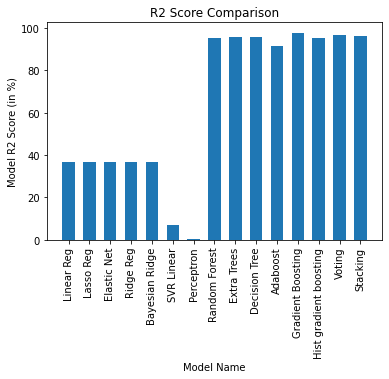

In [ ]:
# Comparing the R2 scores of all models
import matplotlib.pyplot as plt
import seaborn as sns

x = ["Linear Reg", "Lasso Reg", "Elastic Net", "Ridge Reg", "Bayesian Ridge", "SVR Linear", "Perceptron", "Random Forest", "Extra Trees", "Decision Tree", "Adaboost",
     "Gradient Boosting", "Hist gradient boosting", "Voting", "Stacking"]

y = [linear_r2 * 100, lasso_r2 * 100, el_r2 * 100, ridge_r2 * 100, br_r2 * 100, svm_r2 * 100, percept_r2 * 100, rf_r2 * 100, extra_r2 * 100, tree_r2 * 100,
     ada_r2 * 100, gb_r2 * 100, hist_r2 * 100, voting_r2 * 100, stack_r2 * 100]

#Plotting these scores
plt.bar(x, y, width = 0.6)
plt.xticks(rotation = 90)
plt.title("R2 Score Comparison")
plt.xlabel("Model Name")
plt.ylabel("Model R2 Score (in %)")